<center>
<h1>Total variation denoising</h1>
<h2>One dimensional corrupted datasets</h2>
</center>

**Sankhya Singh**

In [1]:

#Using Convex Optimisation library CVXPY
import numpy as np
import numpy.random as rnd

import cvxpy as cvx

import matplotlib.pyplot as plt

Consider a signal $x \in \mathbb{R}^n$ corrupted by noise.
We measure the corrupted signal $x_{\text{corr}}$ and wish to recover a good estimate $\hat{x}$ of the original signal.
To do this we solve the total variation denoising problem

$$
    \text{minimize} \quad \|\hat{x} - x_{\text{corr}}\|_2^2 + \lambda \|D \hat{x}\|_1
$$

where $D$ is the discrete derivative operator.

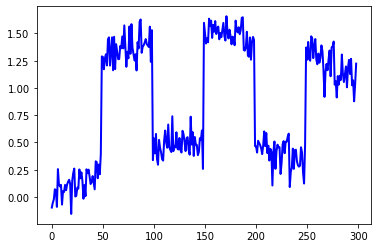

In [2]:
x_corr = np.array([[-0.0975398, -0.05312629, -0.02208009, 0.07036122, 0.05844751, -0.09111081,
    0.25524962, 0.11391867, 0.0960413,  0.11087175, -0.07009398, 0.05289032,
    0.04535016, 0.11058097, 0.06159582, 0.11416539, 0.14135736, 0.15779885,
    0.11841745, -0.15573929, 0.1497802, 0.21942491, 0.26002953, 0.00406207,
    0.01076279, 0.08560526, 0.0758106,  0.25218958, 0.17094868, 0.22549197,
    0.14582193, 0.04450351 -0.06080554, 0.10889565, 0.00731979, 0.25383178,
    0.21807304, 0.25086839, 0.18829612, 0.11829805, 0.13624649, 0.19156383,
    0.13209717, 0.06982474, 0.32671382, 0.31943926, 0.17156955, 0.29698227,
    0.20784119, 0.39387925, 1.28915111, 1.28466809, 1.17170899, 1.27276483,
    1.30876264, 1.20624095, 1.4475541,  1.46402195, 1.20518098, 1.33903493,
    1.46396276, 1.16194968, 1.46954723, 1.17276413, 1.40154012, 1.3344524,
    1.26395560, 1.26554295, 1.38484967, 1.36392024, 1.47217226, 1.36321748,
    1.57373381, 1.37651055, 1.19416729, 1.33185537, 1.27173017, 1.56374847,
    1.31351920, 1.58509611, 1.37037572, 1.31357229, 1.25089095, 1.30896004,
    1.16045129, 1.4191379,  1.36266027, 1.6084522,  1.62853032, 1.3224233,
    1.37852896, 1.39204502, 1.41821484, 1.4482654,  1.40243864, 1.38977182,
    1.37571206, 1.56182708, 1.23933557, 1.53008693, 0.33778563, 0.53671323,
    0.39959707, 0.57810608, 0.34714623, 0.29574822, 0.52339211, 0.45073105,
    0.40999754, 0.34623906, 0.33349269, 0.51698474, 0.60916496, 0.49911337,
    0.45151697, 0.66435914, 0.45909372, 0.43361937, 0.4120461,  0.73994126,
    0.42003412, 0.46914222, 0.45475553, 0.59319831, 0.44271781, 0.43542827,
    0.54085238, 0.4293042,  0.40759905, 0.60673875, 0.57559843, 0.50406625,
    0.42045591, 0.54069747, 0.54812155, 0.43266464, 0.3882286,  0.73634181,
    0.48057600, 0.59402863, 0.37636053, 0.54966699, 0.48076493, 0.47702163,
    0.38324708, 0.41276572, 0.5387545,  0.52499184, 0.60955938, 0.2569498,
    1.59757400, 1.49974750, 1.40716928, 1.45590647, 1.41881918, 1.63509243,
    1.56638179, 1.61757557, 1.45918297, 1.5779364,  1.51591186, 1.61326905,
    1.49489181, 1.54304499, 1.56310244, 1.44630669, 1.50400512, 1.46626777,
    1.53122419, 1.5964117,  1.47436147, 1.43470409, 1.65776344, 1.5155677,
    1.45429071, 1.53389094, 1.47690731, 1.40044678, 1.46996803, 1.46289985,
    1.39214378, 1.61761391, 1.52735972, 1.50968299, 1.55671309, 1.49293167,
    1.53236883, 1.64304662, 1.6484901,  1.34768638, 1.34205666, 1.37332403,
    1.5150243,  1.29612487, 1.28611079, 1.46331723, 1.25927328, 1.42103747,
    1.46826865, 1.44057849, 0.46655008, 0.46351578, 0.40746583, 0.51540203,
    0.49632221, 0.4754424,  0.4461718,  0.3927947,  0.47569079, 0.60111625,
    0.46577111, 0.58634933, 0.4030563,  0.47001092, 0.33429442, 0.44149961,
    0.41634793, 0.10497809, 0.41269741, 0.50849201, 0.25793693, 0.41901946,
    0.47958449, 0.45448622, 0.4556222,  0.21116683, 0.31353546, 0.48157662,
    0.51232681, 0.40093506, 0.50693641, 0.50623056, 0.55246491, 0.58091882,
    0.09088771, 0.23097229, 0.27061655, 0.44344447, 0.25751509, 0.42937313,
    0.43329958, 0.32736408, 0.29068132, 0.27797564, 0.28634859, 0.45557439,
    0.4079212,  0.22503599, 0.12318214, 0.47911303, 1.3711563,  1.25869232,
    1.42184876, 1.26588232, 1.2496218,  1.47368919, 1.45357969, 1.27337315,
    1.38442839, 1.44858353, 1.25867526, 1.21725032, 1.31520763, 1.23095494,
    1.27825279, 1.39025742, 1.33612252, 1.16553053, 0.91782687, 1.14797106,
    1.2204012,  1.16296689, 1.26227372, 1.34358803, 1.10705193, 1.37268357,
    1.38178853, 1.42554157, 1.02966171, 1.06281221, 0.91270071, 1.10881591,
    1.03056827, 1.11251789, 1.07339657, 1.30644577, 1.12965944, 1.05443219,
    1.12534765, 1.19720807, 1.00582764, 1.18393038, 1.25752049, 1.12823257,
    1.26705351, 1.02434442, 1.07000497, 0.87731374, 1.03442913, 1.22304696]]).T
n = len(x_corr)
# This is the signal of the corrupted noise given 
plt.figure()
plt.plot(x_corr, linewidth=2, color='b')

In [3]:
x_corr = x_corr.T
x_corr = x_corr[0]
#defining our x^(hat) variable for our denoising problem
X = cvx.Variable(shape=n)
#parameter for the tradeoff between the noisness and decreete gradient of X
lambda1 = cvx.Parameter(nonneg = True)
#defining error
error = cvx.sum_squares(X - x_corr)
# the cvx.tv provides the descreete gradient of vector as L1 norm i.e. norm(value[1:] - value[0:value.shape[0]-1], 1)
obj = cvx.Minimize(error + lambda1*cvx.tv(X))
# we difine the problem 
prob = cvx.Problem(obj)


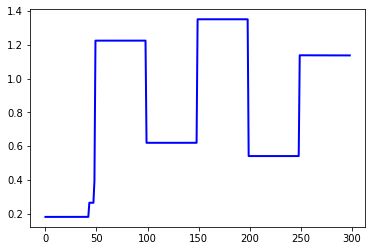

In [5]:
# in order to see the suitable value of lamda we create a dictionary and compute the 
# the function optimum value with respect to these lambda values 
errors = []
variations = []
x_values = []
dict1 = {}
#for checking various lambda values
lambd_values = np.logspace(0, 2)
for v in lambd_values:
    lambda1.value = v
    #solve using scs solver 
    prob.solve(cvx.SCS)
    errors.append(error.value)
    variations.append(cvx.tv(X).value)
    x_values.append(X.value)
    dict1[v] = prob.value
    
# the most preferable value of lambda lies within a range of (5-10)
# with function optimum values lies between (28,47) (see the dict in last cell for more info)
#Lamda values more than 10 gives us a disoriented graph to our original problem while lambda values less than 5
# are more noisy hence lamda = 7 seems pretty reasonable 
# we are defining the objective once again because after so many iterations X.value has been changedfor last value
# of lambda = 100 , so new objective value for lambda = 7 
obj1 = cvx.Minimize(error + 7*cvx.tv(X))
prob1 = cvx.Problem(obj1)
prob1.solve(solver=cvx.SCS)
#plotting the x.value graph 
az = np.reshape(X.value,(-1,1))
plt.figure()
plt.plot(az, linewidth=2, color='b')

<center>
<h1>Total variation in-painting</h1>
<h2>Greyscale image</h2>
</center>

A grayscale image is represented as an $m \times n$ matrix of intensities
$U^\mathrm{orig}$ (typically between the values $0$ and $255$).
We are given the values $U^\mathrm{orig}_{ij}$, for $(i,j) \in \mathcal K$, where
$\mathcal K \subset \{1,\ldots, m\} \times \{1, \ldots, n\}$ is the set of indices
corresponding to known pixel values.
Our job is to *in-paint* the image by guessing the missing pixel values,
*i.e.*, those with indices not in $\mathcal K$.
The reconstructed image will be represented by $U \in {\bf R}^{m \times n}$,
where $U$ matches the known pixels, *i.e.*,
$U_{ij} = U^\mathrm{orig}_{ij}$ for $(i,j) \in \mathcal K$.

The reconstruction $U$ is found by minimizing the total variation of $U$,
subject to matching the known pixel values. We will use the $\ell_2$ total
variation, defined as
$$\mathop{\bf tv}(U) =
\sum_{i=1}^{m-1} \sum_{j=1}^{n-1}
\left\| \left[ \begin{array}{c}
 U_{i+1,j}-U_{ij}\\ U_{i,j+1}-U_{ij} \end{array} \right] \right\|_2.$$
Note that the norm of the discretized gradient is *not* squared.

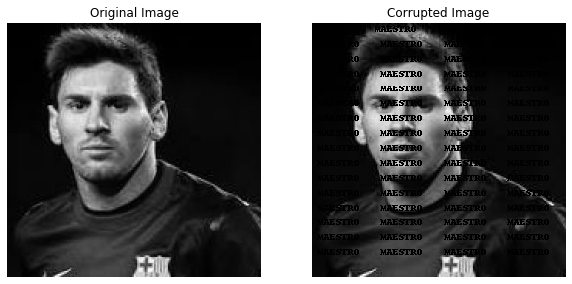

In [10]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import requests
import numpy as np

# Load the images.
# You can place your favorite picture here. The test image has resolution 256x256, 
# that's corresponds to the icon size in google image search
url = 'http://mathulike.com/images/avt/avt236_256by256.jpg'

image = Image.open(requests.get(url, stream=True).raw)
image = image.convert('L')

def corrupt_image(image, text):
  l = len(text) 
  w,h = image.size

  n_ws = int(w/(8*l))
  n_hs = int(h/(16))
  string = ''
  for i in range(n_hs):
    string += text + '\n '
  for i in range(n_ws):
    ImageDraw.Draw(
              image  # Image
              ).text(
                  (int((i/n_ws)*w), 0),  # Coordinates
                  string,  # Text
                  (0)  # Color
              )
  return image

u_orig = np.array(image).astype(np.uint8)
image = corrupt_image(image, 'MAESTRO')

u_corr = np.array(image).astype(np.uint8)
rows, cols = u_orig.shape

# known is 1 if the pixel is known,
# 0 if the pixel was corrupted.
known = np.zeros((rows, cols))
for i in range(rows):
    for j in range(cols):
         if u_corr[i, j] != 0:
            known[i, j] = 1

%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(u_orig, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(u_corr, cmap='gray');
ax[1].set_title("Corrupted Image")
ax[1].axis('off');
fig.savefig('start.png')

In [12]:
import cvxpy as cp

U = cp.Variable(shape=(rows, cols))
obj = cp.Minimize(cp.tv(U))
constraints = [cp.multiply(known, U) == cp.multiply(known, u_corr)]
prob = cp.Problem(obj, constraints)

# Use SCS to solve the problem.
prob.solve(verbose=True, solver=cp.SCS)
print("optimal objective value: {}".format(obj.value))

----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 377865
eps = 1.00e-04, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 130561, constraints m = 260611
Cones:	primal zero / dual free vars: 65536
	soc vars: 195075, soc blks: 65025
Setup time: 4.36e-01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 4.51e+21  5.50e+21  1.00e+00 -1.09e+28  7.84e+26  2.46e+27  6.91e-02 
   100| 9.74e-04  1.58e-03  8.09e-05  4.08e+05  4.08e+05  4.82e-11  5.67e+00 
   200| 1.35e-04  2.44e-04  3.03e-05  4.08e+05  4.08e+05  1.89e

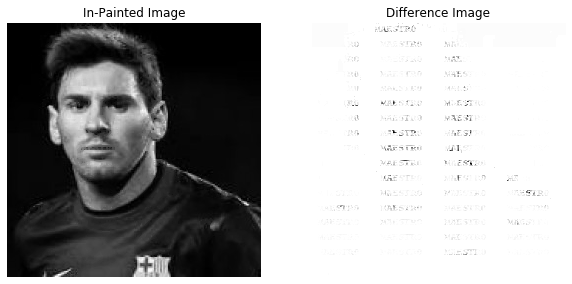

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# Display the in-painted image.
ax[0].imshow(U.value, cmap='gray');
ax[0].set_title("In-Painted Image")
ax[0].axis('off')

img_diff = 10*np.abs(u_orig - U.value)
ax[1].imshow(-img_diff, cmap='gray');
ax[1].set_title("Difference Image")
ax[1].axis('off');
fig.savefig('finish.png')